# Analyse des départ HV - sabado

In [1]:
import pandas as pd
import numpy as np
import os
import datetime
os.chdir("")

## Indication du fichier que l'on va utiliser

In [2]:
file_origine='BA_A_Result.xlsx'

## Lecture du fichier et intégration dans des Dataframes

In [3]:
#Lecture du fichier origine
xl=pd.ExcelFile(file_origine)
#Mise dans un dataframe
df_origine=xl.parse("Data")
#Affichage des 10 premières lignes du dataframe
df_origine.head(10)

,FR1_FECHA,NUM,FR1_FECHA.1,FR1_LINEA,FR1_TIPO,FR1_REGIST,FR1_ORDEN,FR1_TREN,FR1_CAUC1,FR1_CAUC2,...,Dep_Theo_C1_HP_AM,Dep_Reel_C1_HP_AM,Dep_Theo_C2_HP_PM,Dep_Reel_C2_HP_PM,Dep_Theo_C1_HV,Dep_Theo_C2_HV,Dep_Reel_C1_HV,Dep_Reel_C2_HV,Nb_incident_Interrup_C1,Nb_incident_Interrup_C2
0,2015-01-01,0,2015-01-01,A,F,1,1,4,,,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-01,1,2015-01-01,A,F,2,2,5,,,...,0,0,0,0,0,1,0,1,0,0
2,2015-01-01,2,2015-01-01,A,F,3,3,6,,,...,0,0,0,0,0,1,0,1,0,0
3,2015-01-01,3,2015-01-01,A,F,4,4,1,,,...,0,0,0,0,1,1,1,1,0,0
4,2015-01-01,4,2015-01-01,A,F,5,5,2,,,...,0,0,0,0,1,1,1,1,0,0
5,2015-01-01,5,2015-01-01,A,F,6,6,3,,,...,0,0,0,0,1,1,1,1,0,0
6,2015-01-01,6,2015-01-01,A,F,7,7,4,,,...,0,0,0,0,1,1,1,1,0,0
7,2015-01-01,7,2015-01-01,A,F,8,8,5,,,...,0,0,0,0,1,1,1,1,0,0
8,2015-01-01,8,2015-01-01,A,F,9,9,6,,,...,0,0,0,0,1,1,1,1,0,0
9,2015-01-01,9,2015-01-01,A,F,10,10,1,,,...,0,0,0,0,1,1,1,1,0,0


## Affichage pour rappel du type de données

In [4]:
df_origine.dtypes

FR1_FECHA                  datetime64[ns]
NUM                                 int64
FR1_FECHA.1                datetime64[ns]
FR1_LINEA                          object
FR1_TIPO                           object
FR1_REGIST                          int64
FR1_ORDEN                           int64
FR1_TREN                            int64
FR1_CAUC1                          object
FR1_CAUC2                          object
FR1_COCC1                           int64
FR1_COCC2                           int64
FR1_KM                             object
FR1_KMV                            object
FR1_VIAC1                          object
FR1_VIAC2                          object
FR1_SALC1                          object
FR1_SALC2                          object
FR1_SCAUC2                         object
FR1_SCAUC1                         object
TIPO_DIA                           object
SAISON                             object
PERIODO                             int64
LINEA                             

## Indexation selon les dates et les types de jour

In [5]:
#On indexe le tableau origine selon la colonne qui contient des dates
df_new_index = df_origine.set_index(['FR1_FECHA', 'TIPO_DIA'], inplace=False)

df_new_index.head(10)

NUM FR1_FECHA.1 FR1_LINEA FR1_TIPO  FR1_REGIST  \
FR1_FECHA  TIPO_DIA                                                   
2015-01-01 DOMINGO     0  2015-01-01         A        F           1   
           DOMINGO     1  2015-01-01         A        F           2   
           DOMINGO     2  2015-01-01         A        F           3   
           DOMINGO     3  2015-01-01         A        F           4   
           DOMINGO     4  2015-01-01         A        F           5   
           DOMINGO     5  2015-01-01         A        F           6   
           DOMINGO     6  2015-01-01         A        F           7   
           DOMINGO     7  2015-01-01         A        F           8   
           DOMINGO     8  2015-01-01         A        F           9   
           DOMINGO     9  2015-01-01         A        F          10   

                     FR1_ORDEN  FR1_TREN FR1_CAUC1 FR1_CAUC2  FR1_COCC1  \
FR1_FECHA  TIPO_DIA                                                       
2015-01-01 DOMINGO           1         4                              5   
           DOMINGO           2         5                              5   
           DOMINGO           3         6                              5   
           DOMINGO           4         1                              5   
           DOMINGO           5         2                              5   
           DOMINGO           6         3                              5   
           DOMINGO           7         4                              5   
           DOMINGO           8         5                              5   
           DOMINGO           9         6                              5   
           DOMINGO          10         1                              5   

                              ...            Dep_Theo_C1_HP_AM  \
FR1_FECHA  TIPO_DIA           ...                                
2015-01-01 DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   
           DOMINGO            ...                            0   

                    Dep_Reel_C1_HP_AM Dep_Theo_C2_HP_PM Dep_Reel_C2_HP_PM  \
FR1_FECHA  TIPO_DIA                                                         
2015-01-01 DOMINGO                  0                 0                 0   
           DOMINGO                  0                 0                 0   
           DOMINGO                  0                 0                 0   
           DOMINGO                  0                 0                 0   
           DOMINGO                  0                 0                 0   
           DOMINGO                  0                 0                 0   
           DOMINGO                  0                 0                 0   
           DOMINGO                  0                 0                 0   
           DOMINGO                  0                 0                 0   
           DOMINGO                  0                 0                 0   

                    Dep_Theo_C1_HV Dep_Theo_C2_HV Dep_Reel_C1_HV  \
FR1_FECHA  TIPO_DIA                                                
2015-01-01 DOMINGO               0              0              0   
           DOMINGO               0              1              0   
           DOMINGO               0              1              0   
           DOMINGO               1              1              1   
           DOMINGO               1              1              1   
           DOMINGO               1              1              1   
     

In [6]:
df_habil = df_new_index.xs(('HABIL'), level=1)
df_sabado = df_new_index.xs(('SABADO'), level=1)
df_domingo = df_new_index.xs(('DOMINGO'), level=1)

df_habil.head(10)

,NUM,FR1_FECHA.1,FR1_LINEA,FR1_TIPO,FR1_REGIST,FR1_ORDEN,FR1_TREN,FR1_CAUC1,FR1_CAUC2,FR1_COCC1,...,Dep_Theo_C1_HP_AM,Dep_Reel_C1_HP_AM,Dep_Theo_C2_HP_PM,Dep_Reel_C2_HP_PM,Dep_Theo_C1_HV,Dep_Theo_C2_HV,Dep_Reel_C1_HV,Dep_Reel_C2_HV,Nb_incident_Interrup_C1,Nb_incident_Interrup_C2
FR1_FECHA,,,,,,,,,,,,,,,,,,,,,
2015-01-05,460,2015-01-05,A,H,1,1,2,,,5,...,0,0,0,0,0,0,0,0,0,0
2015-01-05,461,2015-01-05,A,H,2,2,3,,,5,...,0,0,0,0,0,0,0,0,0,0
2015-01-05,462,2015-01-05,A,H,3,3,4,,,5,...,0,0,0,0,0,0,0,1,0,0
2015-01-05,463,2015-01-05,A,H,4,4,5,,,5,...,0,0,0,0,0,1,0,1,0,0
2015-01-05,464,2015-01-05,A,H,5,5,6,,,5,...,0,0,0,0,0,1,0,1,0,0
2015-01-05,465,2015-01-05,A,H,6,6,7,,,5,...,0,0,0,0,0,1,1,1,0,0
2015-01-05,466,2015-01-05,A,H,7,7,1,,,5,...,0,0,0,0,1,1,1,1,0,0
2015-01-05,467,2015-01-05,A,H,8,8,2,,,5,...,0,0,0,0,1,1,1,1,0,0
2015-01-05,468,2015-01-05,A,H,9,9,3,,,5,...,0,0,0,0,1,1,1,1,0,0


## Calcul de l'indice du KPI Départ HV par jour - sabado

In [7]:
#Création du DataFrame de résultat
df_temp=pd.DataFrame()

#Nombre de depart Theo HV
df_sabado.loc[:,'Dep_Theo_C1_HV'] = np.where(np.logical_and(df_sabado.loc[:,'INT_C1']!=datetime.timedelta(seconds=1),df_sabado.loc[:,'Desp_HV_C1']==1),1,0)
df_sabado.loc[:,'Dep_Theo_C2_HV'] = np.where(np.logical_and(df_sabado.loc[:,'INT_C2']!=datetime.timedelta(seconds=1),df_sabado.loc[:,'Desp_HV_C2']==1),1,0)
df_temp.loc[:,'Count_Depart_Theo_HV_C1'] = df_habil.loc[:,'Dep_Theo_C1_HV'].resample('D').sum()
df_temp.loc[:,'Count_Depart_Theo_HV_C2'] = df_habil.loc[:,'Dep_Theo_C2_HV'].resample('D').sum()

#Nombre de depart réel HV
df_sabado.loc[:,'Dep_Reel_C1_HV'] = np.where(np.logical_and(pd.notnull(df_sabado.loc[:,'I_REELC1']),df_sabado.loc[:,'Desp_HV_C1']==1),1,0)
df_sabado.loc[:,'Dep_Reel_C2_HV'] = np.where(np.logical_and(pd.notnull(df_sabado.loc[:,'I_REELC2']),df_sabado.loc[:,'Desp_HV_C2']==1),1,0)
df_temp.loc[:,'Count_Depart_reel_HV_C1'] = df_sabado.loc[:,'Dep_Reel_C1_HV'].resample('D').sum()
df_temp.loc[:,'Count_Depart_reel_HV_C2'] = df_sabado.loc[:,'Dep_Reel_C2_HV'].resample('D').sum()

#Calcul de l'indice du KPI départ HV
df_temp.loc[:,'Indice_Depart_HV'] = (df_temp.loc[:,'Count_Depart_reel_HV_C1'] + df_temp.loc[:,'Count_Depart_reel_HV_C2']) / (df_temp.loc[:,'Count_Depart_Theo_HV_C1'] + df_temp.loc[:,'Count_Depart_Theo_HV_C2'])

#Calcul du KPI depart HV
#UP_Depart_HV = 5 * ((df_temp['Count_Depart_Theo_HV_C1'] + df_temp['Count_Depart_Theo_HV_C2']) - (df_temp['Count_Depart_reel_HV_C1'] + df_temp['Count_Depart_reel_HV_C2'])) * coche_result
#df_temp['UP_Depart_HV'] = np.where(df_temp['Indice_Depart_HV']<0.97,UP_Depart_HV,0)

#df_result['UP_Depart_HV'] = df_temp['UP_Depart_HV'].resample('M').sum()

df_temp.loc[:,:].head(10)

C:\Users\SA237250\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Count_Depart_Theo_HV_C1,Count_Depart_Theo_HV_C2,Count_Depart_reel_HV_C1,Count_Depart_reel_HV_C2,Indice_Depart_HV
FR1_FECHA,,,,,
2015-01-05,144,145,0.0,0.0,0.000000
2015-01-06,144,145,0.0,0.0,0.000000
2015-01-07,144,145,0.0,0.0,0.000000
2015-01-08,144,145,0.0,0.0,0.000000
2015-01-09,144,145,0.0,0.0,0.000000
2015-01-10,0,0,132.0,134.0,inf
2015-01-11,0,0,0.0,0.0,NaN
2015-01-12,144,145,0.0,0.0,0.000000
2015-01-13,144,145,0.0,0.0,0.000000


In [8]:
#Somme du nombre d'intervalles excédentaires
a = df_temp['Count_Depart_reel_HV_C1'] + df_temp['Count_Depart_reel_HV_C2']

print(a.sum())

46430.0


## Mettre sur la même base le nombre d'intervale théorique (100)

In [9]:
df_temp['Count_Depart_reel_HV'] = (df_temp['Count_Depart_reel_HV_C1'] + df_temp['Count_Depart_reel_HV_C2']) * 100 / (df_temp['Count_Depart_Theo_HV_C1'] + df_temp['Count_Depart_Theo_HV_C2'])

df_temp['Count_Depart_Theo_HV'] = 100

df_temp.head(10)

,Count_Depart_Theo_HV_C1,Count_Depart_Theo_HV_C2,Count_Depart_reel_HV_C1,Count_Depart_reel_HV_C2,Indice_Depart_HV,Count_Depart_reel_HV,Count_Depart_Theo_HV
FR1_FECHA,,,,,,,
2015-01-05,144,145,0.0,0.0,0.000000,0.000000,100
2015-01-06,144,145,0.0,0.0,0.000000,0.000000,100
2015-01-07,144,145,0.0,0.0,0.000000,0.000000,100
2015-01-08,144,145,0.0,0.0,0.000000,0.000000,100
2015-01-09,144,145,0.0,0.0,0.000000,0.000000,100
2015-01-10,0,0,132.0,134.0,inf,inf,100
2015-01-11,0,0,0.0,0.0,NaN,NaN,100
2015-01-12,144,145,0.0,0.0,0.000000,0.000000,100
2015-01-13,144,145,0.0,0.0,0.000000,0.000000,100


## Affichage des informations du nb d'interval

In [10]:
df_final = df_temp

df_final = df_final.mask(lambda x: x['Count_Depart_Theo_HV_C1'] == 0)

df_final.dropna(subset=['Count_Depart_reel_HV'], inplace=True)

#Descriptif des interruptions C1
df_final['Count_Depart_reel_HV'].describe()

count    757.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Count_Depart_reel_HV, dtype: float64

## Model data by finding best fit distribution to data

ValueError: `bins` must be positive, when an integer

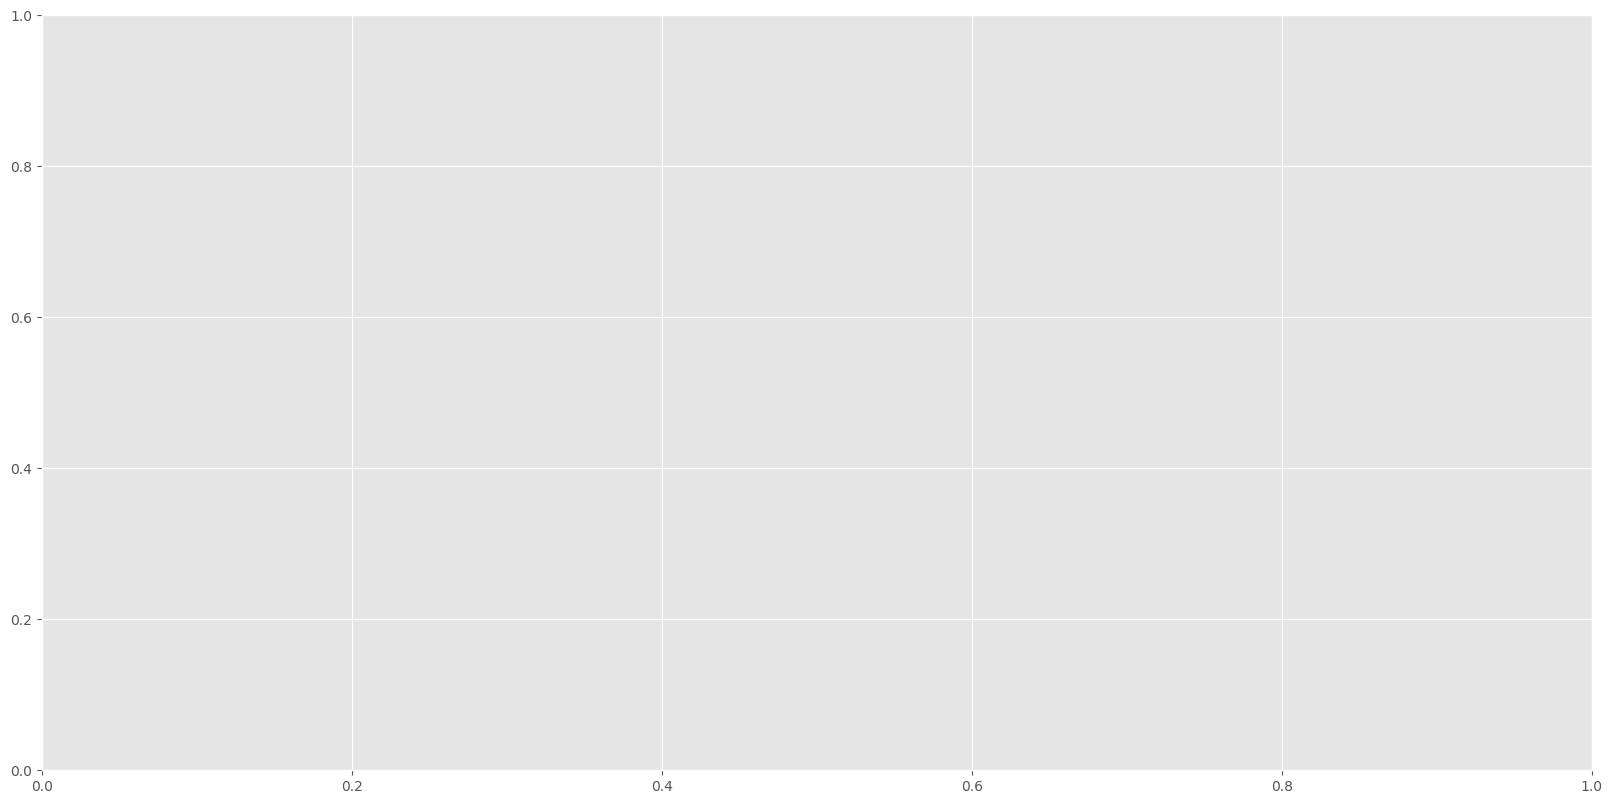

In [11]:
#https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt
from cycler import cycler

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf
    sses = []
    
    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                sses.append([sse, distribution.name, params])
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    #Export en CSV
    df = pd.DataFrame(sses)
    filename = 'BA_' + df_origine.iloc[1,3] + '_Interval sabado_Distribution.csv'
    df.to_csv(filename, index=False, encoding='utf-8', sep=';', decimal=',')
    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Propbability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
#data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())
#data_temp = df_final['Indice_Interval']
data = df_final['Count_Depart_reel_HV']
nb_pas = np.absolute(np.int(data.max() / 1))

# Plot for comparison
plt.figure(figsize=(20,10), dpi=100)
#plt.xticks(np.linspace(0, 24, 9))
#plt.yticks(np.linspace(0, 0.14, 8))
ax = data.plot(kind='hist', bins=nb_pas, density=True, alpha=0.5, color=plt.rcParams['axes.prop_cycle'].by_key()['color'])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fir_paramms = best_fit_distribution(data, nb_pas, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Depart HV\n All Fitted Distributions')
ax.set_xlabel(u'Depart HV')
ax.set_ylabel('Frequency')

#Enregistrement du graphique
plt.savefig('BA_' + df_origine.iloc[1,3] + '_Depart HV sabado_All.png', dpi=200)

# Make PDF
pdf = make_pdf(best_dist, best_fir_paramms)

# Display
plt.figure(figsize=(20,10), dpi=100)
#plt.xticks(np.linspace(0, 24, 9))
#plt.yticks(np.linspace(0, 0.14, 9))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=nb_pas, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
dist_str = '{}({})'.format(best_fit_name, param_str)

#ax.set_ylim(dataYLim)
ax.set_title(u'Depart HV with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Depart HV')
ax.set_ylabel('Frequency')

#Enregistrement du graphique
plt.savefig('BA_' + df_origine.iloc[1,3] + '_Depart HV sabado_Best.png', dpi=200)

## Test de la meilleure distribution trouvée

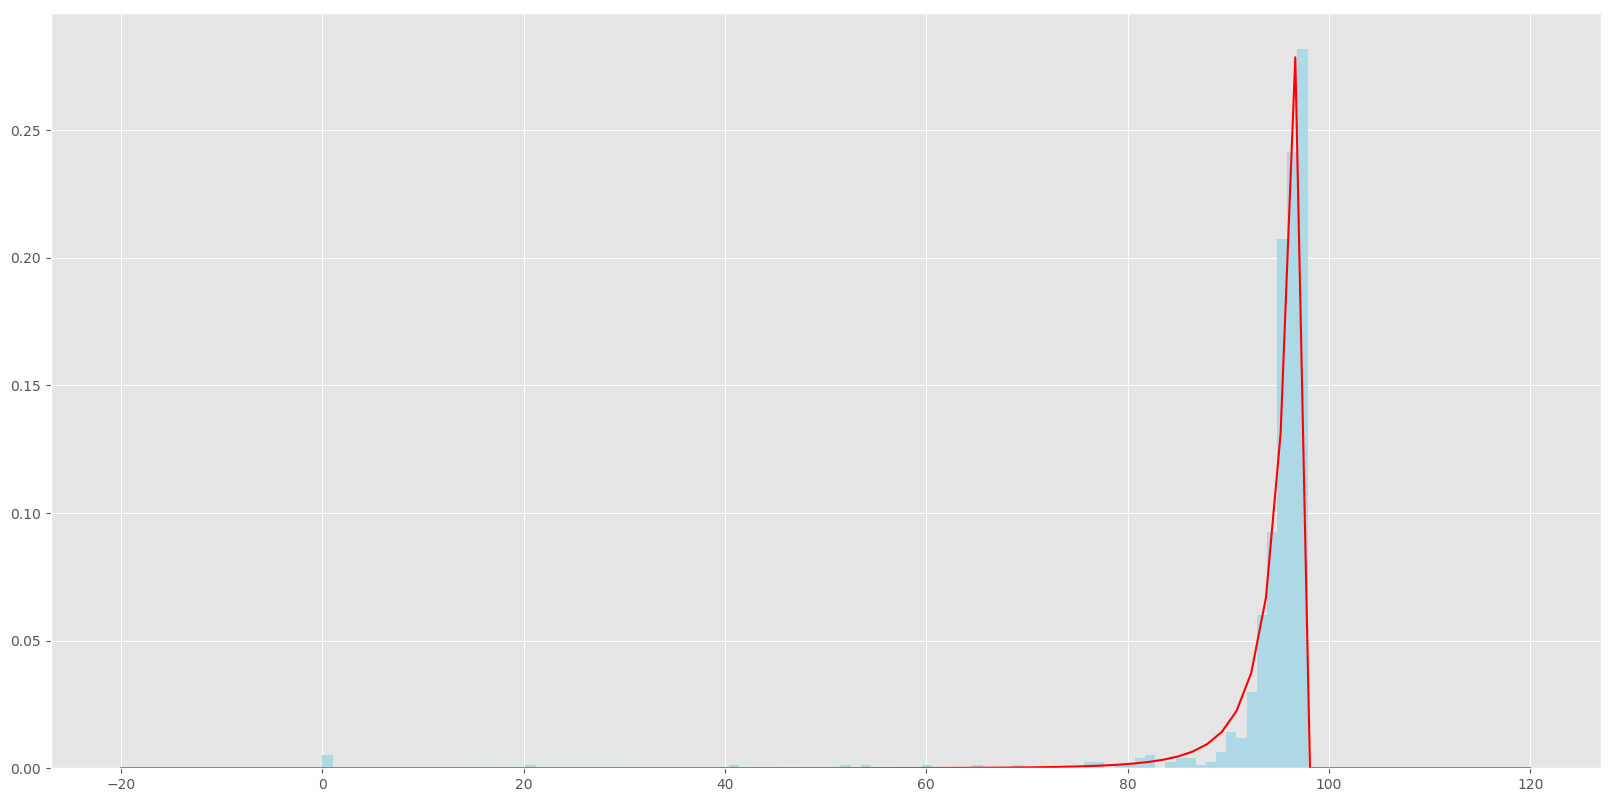

[96.85096232 96.14019648 93.97094834 95.7209032  92.3727827  87.37631546
 97.92060604 97.39265336 97.4392779  96.10569002 96.42016912 96.8465167
 97.34819186 97.5795463  97.60862489 97.17647259 97.16934706 91.64880816
 97.02736406 94.94148928 97.62614801 96.20057518 97.53167862 96.66456952
 93.54147073 95.46721695 96.08718593 93.74007878 96.30318141 97.0750748
 90.97032563 96.96979198 79.87259089 93.61585516 96.26376577 94.95194553
 93.02095107 97.87876997 95.52543013 96.20325249 97.17652803 97.11623362
 97.21885911 96.90030231 93.0377554  95.87623673 96.55068418 94.21785013
 95.4993474  95.66218444 92.50023165 92.2657964  97.43656749 96.10919274
 96.90048684 95.63921908 97.42891399 95.25062804 96.11950974 96.17921551
 97.6637253  84.34905315 96.6583417  97.51716885 94.9826947  97.55944434
 97.19359309 80.3791928  95.17209087 94.34874377 96.75351112 88.18417835
 96.53439397 96.89798926 92.73574728 96.50660409 94.23716137 95.281516
 95.56286746 95.6141429  96.92364977 97.56556614 95.263

In [23]:
ser = df_final['Count_Depart_reel_HV']

nb_pas = np.int(ser.max() / 1)

matplotlib.style.use('ggplot')

plt.figure(figsize=(20,10), dpi=100)

plt.hist(ser, density=True, bins=nb_pas, color='lightblue')

xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)
lnspc = np.linspace(xmin, xmax, nb_pas)

pdf_distri = st.johnsonsb.pdf(lnspc, a=-7.59, b=1.01, loc=-3378.02, scale=3476.06)  
plt.plot(lnspc, pdf_distri, color="red")

#plt.xticks(np.linspace(0, 24, 9))

plt.show()

r = st.johnsonsb.rvs(a=-7.59, b=1.01, loc=-3378.02, scale=3476.06, size=100)

#r = r * 210 / 100

#d = r[r>3]

print(r)
